In this notebook my goal is to try to find the model that classifies patients with the greatest precision, subdividing them by class, using the attributes that describe the characteristics of each patient.
Therefore, I will proceed by separating the predictors which are the numerical attributes, from the target which is the class to which the patient belongs.

The contents of this notebook will be:
- Exploratory Data Analysis
- Feature Extraction (PCA,LDA)
- Train_test_split and cross-validation methods
- Multinomial Logistic Regression
- Decision Tree
- K-Nearest Neighbors
- Learning curve
- Confusion Matrix
- Accuracy, Precision, Recall
- Conclusions


In [1]:
import pandas as pd # It helps me to manipulate sequential and tabular data
import numpy as np # Linear algebra
import seaborn as sns # It helps me to plot high level graphical interface 
import sklearn #This library provides a great number of classification algorithms
import matplotlib.pyplot as plt # This module permits me to plot 2D grphics
% matplotlib inline 


#  Exploratory Data Analysis

In [2]:
df=pd.read_csv('column_3C_weka.csv')
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


Initially it is possible to observe that the dataset is composed of 310 entries and for each entry we have 7 columns, 6 of which represent the biomechanical characteristics of the patient and a categorical that is the class with which the patient has been labeled. It is very interesting to note that there are no missing data for all patients.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


With describe() function I obtain a summary of statistical measures

In [4]:
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


I separate the predictor from response

In [5]:
X=df.drop(['class'],axis=1) #Predictors

Y=df['class'].values #Response
#print(Y)
X.head()
#print(len(X))

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


Let's now look at these numerical results by graphing them through box-plots:

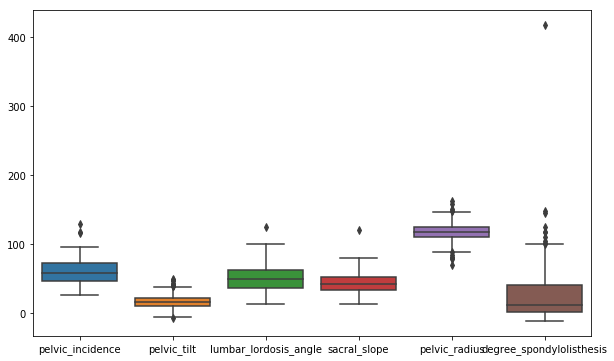

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(data=X,orient='v')
plt.show()


In all distributions there are outliers, in particular the maximum outlier of the "degree_spondylolisthesis" attribute that is very far from the other attributes is obvious to the eye. By analyzing the relative values of that patient better, I noticed quite strange values compared to the other patients in the same category, so thinking it was a transcription error during the collection of the dataset I decided to eliminate it.

In [7]:
x=df[df['degree_spondylolisthesis']>100]
x.head(5)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
71,86.900794,32.928168,47.794347,53.972627,135.075364,101.719092,Spondylolisthesis
75,70.221452,39.822724,68.118403,30.398728,148.525562,145.378143,Spondylolisthesis
76,86.753609,36.043016,69.221045,50.710593,139.414504,110.860782,Spondylolisthesis
95,57.522356,33.647075,50.909858,23.875281,140.981712,148.753711,Spondylolisthesis
115,129.834041,8.404475,48.384057,121.429566,107.690466,418.543082,Spondylolisthesis


In [8]:
x=df[df['degree_spondylolisthesis']<400]
X=x.drop(['class'],axis=1) #Predictors
Y=x['class'].values #Response
X.head()
#Now I have 309 record instead than 310

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


Deleting the anomalous value gives a better view of the graphical representation:

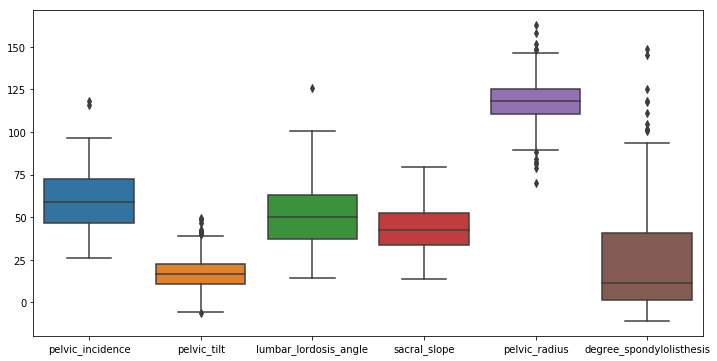

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(data=X,orient='v')
plt.show()


From the distance between each quartile and the median it is possible to notice how the attribute 'degree_spondylolisthesis' has a clear positive asymmetric distribution (because the median is smaller than average) with respect to the other attribute groups, moreover it is possible to observe how the standard deviation of this attribute is very high and this indicates that the data accumulate in areas far from the expected value.

From the following graph we can also see how the values of the biomechanical variables for each class vary.

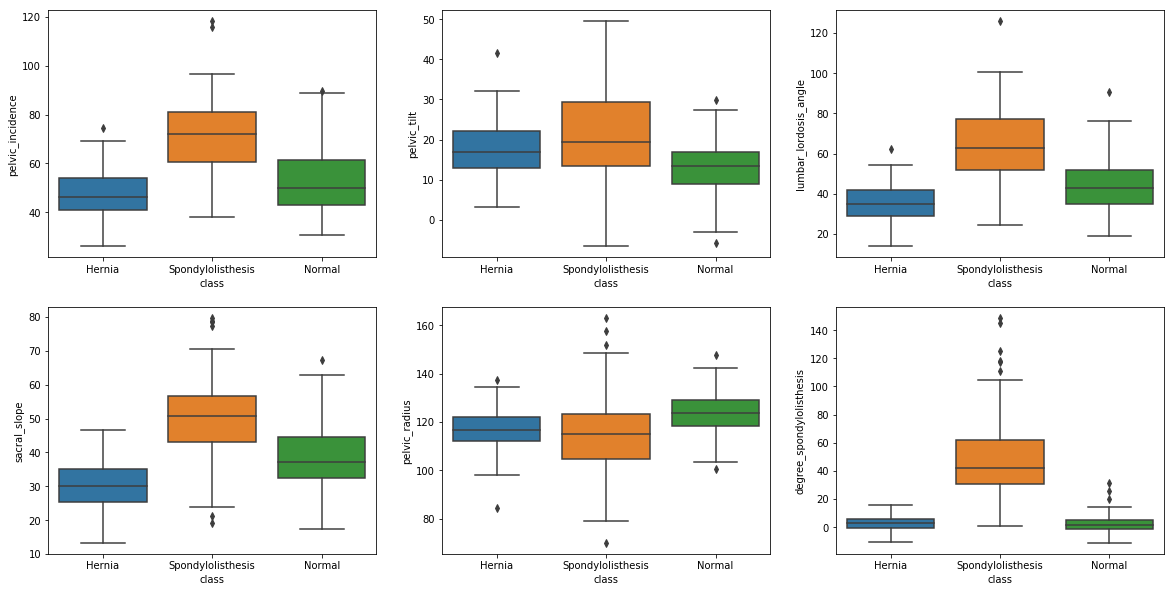

In [10]:
#Create boxplot for each variable
plt.figure(figsize=(20,10))
for id, var in enumerate(X):
    plt.subplot(2,3,id+1)
    sns.boxplot(x='class', y=var, data=x)

The distribution of patients by class tells us that we have 60 (19.4%) patients diagnosed with Hernia, 149 (48.2%) patients with Spondylolysis and 100 (32.3%) patients with a spinal column Normal;

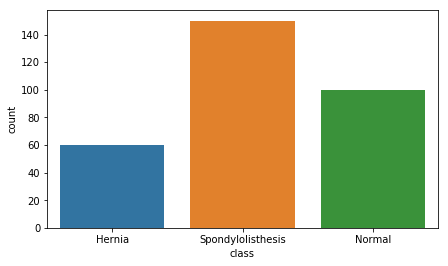

In [11]:
plt.figure(figsize=(7,4))
sns.countplot('class', data=df)
plt.show()

Putting aside the classes we try to see now the correlation between the various variables, to get an idea also on the link between one variable and another.

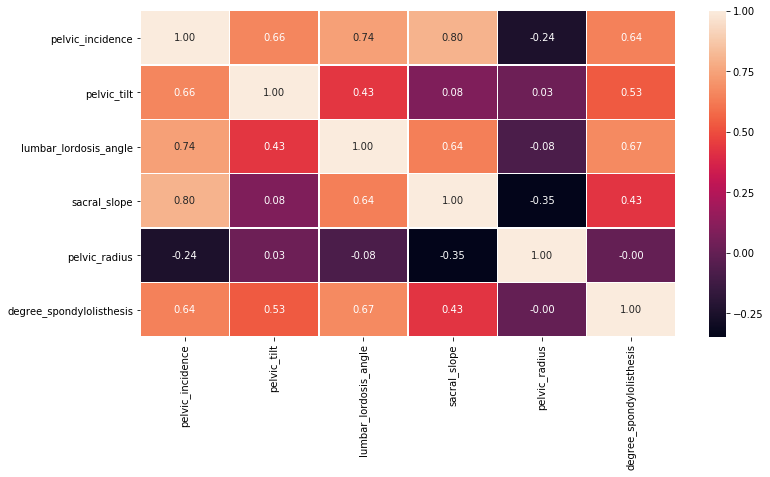

In [12]:
fig, ax = plt.subplots(figsize=(12,6)) 
sns.heatmap(X.corr(), annot=True, fmt=".2f",linewidths=.5,ax=ax)
plt.show()


The following pairplot shows us graphically the mathematical model that binds the biomechanical variables:

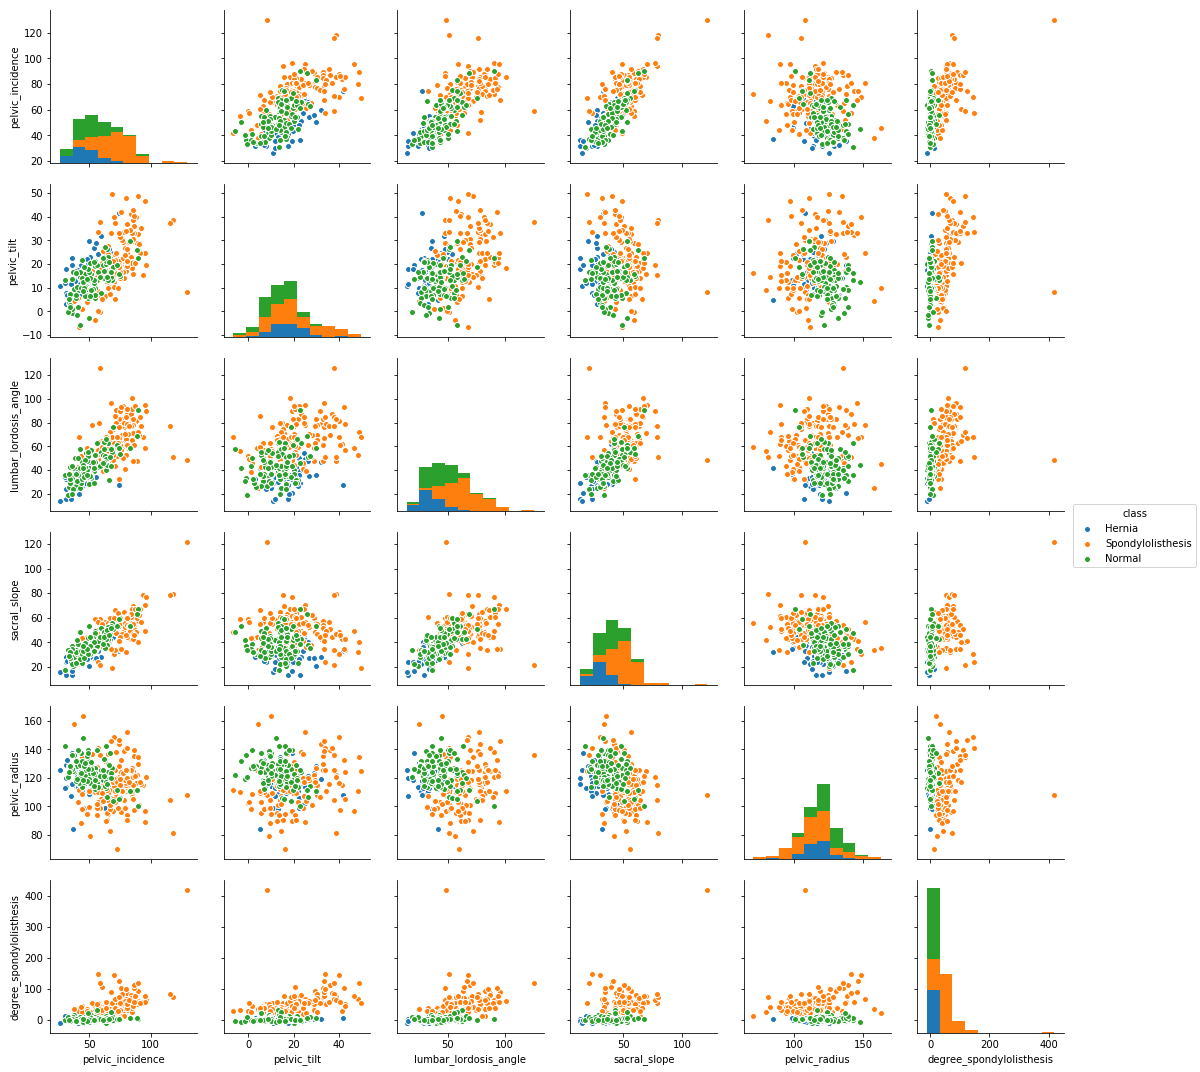

In [13]:
g = sns.pairplot(df, hue='class')

# Principal Component Analysis

In [14]:
#Standardize the data 
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(X)
scaled_df = pd.DataFrame(X_std, columns=['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis'])
#print(np.std(X_std))

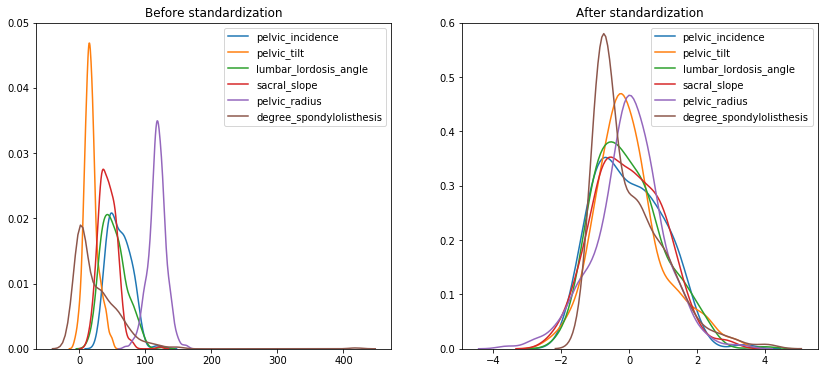

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))
ax1.set_title('Before standardization')
sns.kdeplot(df['pelvic_incidence'], ax=ax1)
sns.kdeplot(df['pelvic_tilt'], ax=ax1)
sns.kdeplot(df['lumbar_lordosis_angle'], ax=ax1)
sns.kdeplot(df['sacral_slope'], ax=ax1)
sns.kdeplot(df['pelvic_radius'], ax=ax1)
sns.kdeplot(df['degree_spondylolisthesis'], ax=ax1)
ax1.set_ylim(0,0.05)
ax2.set_title('After standardization')
sns.kdeplot(scaled_df['pelvic_incidence'], ax=ax2)
sns.kdeplot(scaled_df['pelvic_tilt'], ax=ax2)
sns.kdeplot(scaled_df['lumbar_lordosis_angle'], ax=ax2)
sns.kdeplot(scaled_df['sacral_slope'], ax=ax2)
sns.kdeplot(scaled_df['pelvic_radius'], ax=ax2)
sns.kdeplot(scaled_df['degree_spondylolisthesis'], ax=ax2)
ax2.set_ylim(0,0.6)

plt.show()


In [16]:
cov_mat=np.cov(X_std.T) # with np.cov I compute the covariance matrix of the standardized data
eigen_vals,eigen_vecs=np.linalg.eig(cov_mat)# with linalg.eig I compute eigenvalues and eigenvectorscalcolo eigen_vals
print('\nEigenvalues \n%s' % eigen_vals)
print('\nEigenvectors \n%s' % eigen_vecs)



Eigenvalues 
[  3.35500251e+00   1.24651808e+00   4.09435174e-17   7.36039764e-01
   4.15351366e-01   2.66568803e-01]

Eigenvectors 
[[  5.23483401e-01   4.76445081e-02   7.20947140e-01  -7.92384837e-02
    3.99286193e-01   1.95504858e-01]
 [  3.47196232e-01  -4.71430478e-01  -4.29483196e-01  -6.26443032e-01
    2.78341728e-01  -5.33598723e-02]
 [  4.72743625e-01  -4.44724845e-02  -6.69643418e-12   2.94920566e-01
   -1.57329417e-01  -8.14128355e-01]
 [  4.19759810e-01   4.35447283e-01  -5.43856052e-01   3.89661927e-01
    3.09495764e-01   3.01303692e-01]
 [ -1.28599149e-01  -7.16764446e-01  -3.88257201e-12   5.97316596e-01
    3.13801852e-01   1.20217596e-01]
 [  4.34968195e-01  -2.64839379e-01  -3.94288295e-12   7.54235919e-02
   -7.37620935e-01   4.36908928e-01]]


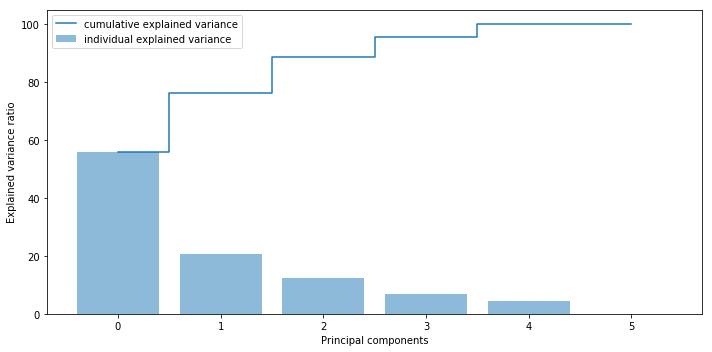

In [17]:
tot=sum(eigen_vals)
var_exp=[(i/tot)*100 for i in sorted(eigen_vals,reverse=True)]
cum_var_exp=np.cumsum(var_exp)
#print(len(var_exp))
plt.figure(figsize=(10,5))
plt.bar(range(6),var_exp,alpha=0.5,align='center',label='individual explained variance')
plt.step(range(6),cum_var_exp,where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
    

In [18]:
print("Variance explained by every single main component:")
print(var_exp)
print("\n")
print("Total variance explained:")
print(cum_var_exp)

Variance explained by every single main component:
[55.735748229369243, 20.708067332836468, 12.227629297260133, 6.9001197882520282, 4.4284353522821238, 6.801835686882662e-16]


Total variance explained:
[  55.73574823   76.44381556   88.67144486   95.57156465  100.          100.        ]


In [19]:
#I do the list of the (eigenvalue,eigenvector) tuples
eigen_pairs=[(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
# I sort the tuples (eigenvectors,eigenvalues) in discending order
eigen_pairs.sort(key=lambda x:x[0],reverse=True)

print('Eigenvalues in ordine discendente:')
for i in eigen_pairs:
    print(i[0])

Eigenvalues in ordine discendente:
3.35500250705
1.24651807906
0.736039763543
0.415351366475
0.266568803348
4.09435174139e-17


In [20]:
#I choose the first Principal Component because I want to plot data in 2 dimensions
matrix_w=np.hstack((eigen_pairs[0][1][:,np.newaxis],
                   eigen_pairs[1][1][:,np.newaxis],
                   ))
print('Matrix W:\n',matrix_w)
print(np.shape(matrix_w))
print(np.shape(X_std))

Matrix W:
 [[ 0.5234834   0.04764451]
 [ 0.34719623 -0.47143048]
 [ 0.47274362 -0.04447248]
 [ 0.41975981  0.43544728]
 [-0.12859915 -0.71676445]
 [ 0.4349682  -0.26483938]]
(6, 2)
(309, 6)


In [21]:
#I transform the original 309x6 matrix in 309x2 data matrix
X_std_pca=X_std.dot(matrix_w)# (319*6)*(6*2)= (310*2)
print(X_std_pca)

[[-0.30700977  0.98648638]
 [-2.3240703   0.25780783]
 [ 0.21529734  0.8395977 ]
 [ 0.35397069  0.76462793]
 [-1.44606855  0.98669137]
 [-2.42593271 -0.85027976]
 [-1.11903998 -0.05374956]
 [-2.06162513  0.40589699]
 [-1.54027196 -0.53902562]
 [-1.81776061  2.20013006]
 [-1.59577813  0.81508851]
 [-3.17132074 -0.90395806]
 [-1.28298244 -0.51465853]
 [-1.09843496  0.09419493]
 [-0.57328863 -0.40778402]
 [-1.78065417 -0.30543828]
 [-0.01484322  0.42796199]
 [-2.79820111 -0.26451662]
 [-2.31915716 -0.49002471]
 [-2.12320991  0.09973074]
 [-1.84445949 -1.02454056]
 [-0.98305526 -0.65351978]
 [ 0.22168173  0.24359654]
 [-1.93957583  0.13239702]
 [-2.51500441 -0.89138368]
 [-1.17648471 -0.9120571 ]
 [-3.75015044 -0.70667723]
 [-1.34911457  0.08535228]
 [-1.90199894 -0.31378503]
 [ 0.02262464  0.13374086]
 [-1.0000634   0.28209532]
 [-1.49164595  1.25691878]
 [-1.88361147 -0.33348328]
 [-2.09138783 -0.58122033]
 [-0.51072596 -1.05657425]
 [-2.83056827  0.19214182]
 [-2.64340419 -0.75577106]
 

- The plot of the data using the first two principal component is the follow:

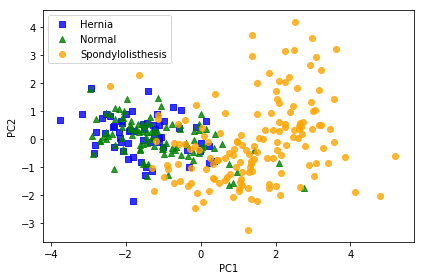

In [23]:
colors=['blue','green','orange']
markers=['s','^','o']
plt.figure(figsize=(6,4))
for lab,col,m in zip(np.unique(Y),colors,markers):
    plt.scatter(X_std_pca[Y==lab,0],X_std_pca[Y==lab,1]*-1,label=lab,c=col,marker=m,alpha=0.8)
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [24]:
#I implement PCA using sklearn
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components=2)
T=pca.fit_transform(X_std)#Fit the model with X and apply the dimensionality reduction on X.

In [25]:
import math

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(X.columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] :round( math.sqrt(xvector[i]**2 + yvector[i]**2),2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print ("Features for importance:\n\n",important_features)

get_important_features(T, pca.components_, X.columns.values)

Features for importance:

 [(3.07, 'pelvic_radius'), (2.84, 'sacral_slope'), (2.72, 'pelvic_incidence'), (2.67, 'pelvic_tilt'), (2.51, 'degree_spondylolisthesis'), (2.46, 'lumbar_lordosis_angle')]


In [26]:
def draw_vectors(transformed_features, components_, columns):
    """
    This funtion will project your *original* features
    onto your principal component feature-space, so that you can
    visualize how "important" each one was in the
    multi-dimensional scaling
    """

    num_columns = len(X.columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ax = plt.axes()
    

    for i in range(num_columns):
    # Use an arrow to project each original feature as a
    # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='black', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='black', alpha=0.9)

    return ax

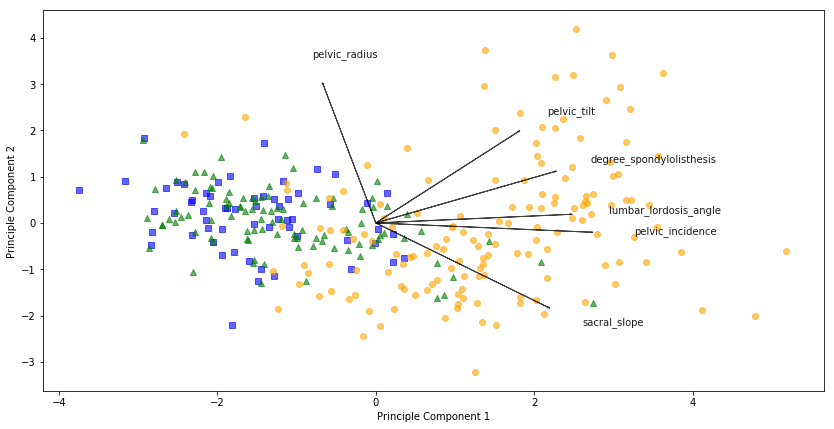

In [27]:
plt.figure(figsize=(14,7))
ax = draw_vectors(T, pca.components_, X.columns.values)
T_df = pd.DataFrame(T)
T_df.columns = ['component1', 'component2']
T_df=T_df.values
colors=['blue','green','orange']
markers=['s','^','o']

for lab,col,m in zip(np.unique(Y),colors,markers):
    plt.scatter(T_df[Y==lab,0],T_df[Y==lab,1],label=lab,c=col,marker=m,alpha=0.6)

plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')

plt.show()
#print(T_df)

In the following plot we have that the ligthing points represent the projected after applying PCA, the dark spots in cross shapes represent the original data

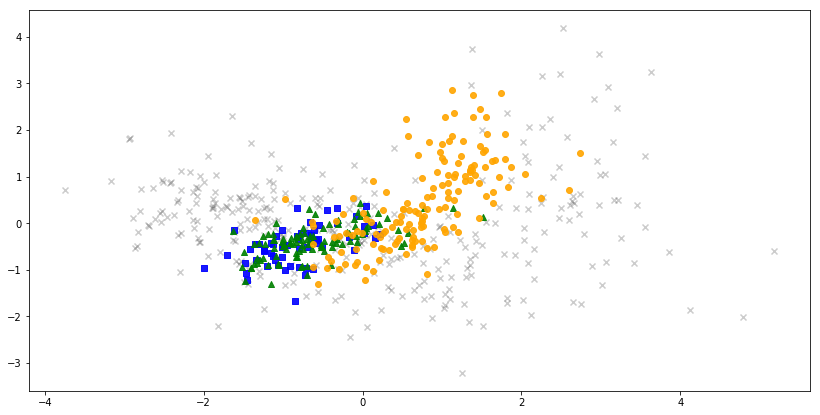

In [28]:
#I punti luminosi sono i dati proiettati,mentre quelli scuri sono i dati originali
X_new = pca.inverse_transform(T)
colors=['blue','green','orange']
markers=['s','^','o']
plt.figure(figsize=(14,7))
plt.scatter(T[:, 0], T[:, 1], alpha=0.2,c='black',marker='x')
for lab,col,m in zip(np.unique(Y),colors,markers):
    plt.scatter(X_new[Y==lab,0],X_new[Y==lab,1],label=lab,c=col,marker=m,alpha=0.9)


# Linear Discriminant Analysis

In [29]:
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()
label_encoder=enc.fit(Y)
Enc_y=label_encoder.transform(Y)+1
label_dict={1:'Hernia',2:'Normal',3:'Spondylolisthesis'}
np.set_printoptions(precision=4)
mean_vecs=[]
for cl in range(1,4):
    mean_vecs.append(np.mean(X[Enc_y==cl],axis=0))
    print('Mean vector class %s:\n%s\n'%(label_dict[cl],mean_vecs[cl-1]))

Mean vector class Hernia:
pelvic_incidence             47.638407
pelvic_tilt                  17.398795
lumbar_lordosis_angle        35.463524
sacral_slope                 30.239612
pelvic_radius               116.474968
degree_spondylolisthesis      2.480251
dtype: float64

Mean vector class Normal:
pelvic_incidence             51.685244
pelvic_tilt                  12.821414
lumbar_lordosis_angle        43.542605
sacral_slope                 38.863830
pelvic_radius               123.890834
degree_spondylolisthesis      2.186572
dtype: float64

Mean vector class Spondylolisthesis:
pelvic_incidence             71.122816
pelvic_tilt                  20.830881
lumbar_lordosis_angle        64.215652
sacral_slope                 50.291935
pelvic_radius               114.564638
degree_spondylolisthesis     49.435973
dtype: float64



In [106]:
d=6
S_W=np.zeros((d,d))#scatter matrix is the same of covariance matrix; the cov matrix is normalized version of the scatter matrix
for cl,mv in zip(range(1,4),mean_vecs):
    class_sc_mat=np.zeros((d,d)) #scatter matrix per ogni classe
    for row in X_std[Enc_y==cl]:
        row,mv=row.reshape(d,1),mv.reshape(d,1)#costruisco i vettori colonna
        class_sc_mat+=(row-mv).dot((row-mv).T) 
    S_W+=class_sc_mat #sommo le scatter matrici delle classi
print('Within-class scatter matrix: %sx%s' % (S_W.shape[0],S_W.shape[1]))
print('within-class scatter matrix:\n',S_W)




Within-class scatter matrix: 6x6
within-class scatter matrix:
 [[ 1153208.5103   335440.2951  1002668.8744   817042.794   2188528.465
    535413.7796]
 [  335440.2951    98797.255    290737.3092   236509.5897   636812.1268
    155942.4285]
 [ 1002668.8744   290737.3092   874851.9104   711053.6065  1884689.155
    480521.5433]
 [  817042.794    236509.5897   711053.6065   580015.5743  1551970.9316
    377609.8067]
 [ 2188528.465    636812.1268  1884689.155   1551970.9316  4304014.4953
    890888.0136]
 [  535413.7796   155942.4285   480521.5433   377609.8067   890888.0136
    353940.1642]]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [85]:
#Compute the between-class scatter matrix
mean_overall=np.mean(X_std,axis=0)
d=6
S_B=np.zeros((d,d))#between class scatter matrix
for i,mean_vec in enumerate(mean_vecs):
    n=X_std[Enc_y==i+1,:].shape[0]
    mean_vec=mean_vec.reshape(d,1) #costruisco il vettore colonna
    mean_overall=mean_overall.reshape(d,1)
    S_B+=n*(mean_vec-mean_overall).dot((mean_vec-mean_overall).T)
print('Between-class scatter matrix: %sx%s' % (S_B.shape[0],S_B.shape[1]))
print('Between-class scatter matrix:\n',S_B)




Between-class scatter matrix: 6x6
Between-class scatter matrix:
 [[ 1157011.2962   336749.9265  1006929.0661   820261.3698  2187329.5037
    542278.4734]
 [  336749.9265    99256.8628   292161.7521   237493.0637   636022.8787
    158832.1294]
 [ 1006929.0661   292161.7521   879479.3869   714767.314   1883459.3356
    487808.3338]
 [  820261.3698   237493.0637   714767.314    582768.3061  1551306.625
    383446.344 ]
 [ 2187329.5037   636022.8787  1883459.3356  1551306.625   4304512.3629
    888301.3857]
 [  542278.4734   158832.1294   487808.3338   383446.344    888301.3857
    364990.6044]]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


In [32]:
eigen_vals,eigen_vecs=np.linalg.eig(np.linalg.inv(S_W).dot(S_B))


In [33]:
#I do the list of the (eigenvalue,eigenvector) tuples
eigen_pairs=[(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
# I sort the (eigenvectors,eigenvalues) tuples in descending order
eigen_pairs=sorted(eigen_pairs,key=lambda x:x[0],reverse=True)
#stampo
print('Eigenvalues in ordine discendente:')
for i in eigen_pairs:
    print(i[0])

Eigenvalues in ordine discendente:
1.68792945986
1.08615779626
0.999891119938
3.76143582003e-10
3.71016435071e-12
3.71016435071e-12


In [34]:
print('Discriminability ratio:\n')
eigv_sum=sum(eigen_vals)
for i,j in enumerate(eigen_pairs):
    print('Linear discriminant {0:}:{1:.2%}'.format(i+1,(j[0]/eigv_sum).real))

Discriminability ratio:

Linear discriminant 1:44.73%
Linear discriminant 2:28.78%
Linear discriminant 3:26.49%
Linear discriminant 4:0.00%
Linear discriminant 5:0.00%
Linear discriminant 6:0.00%


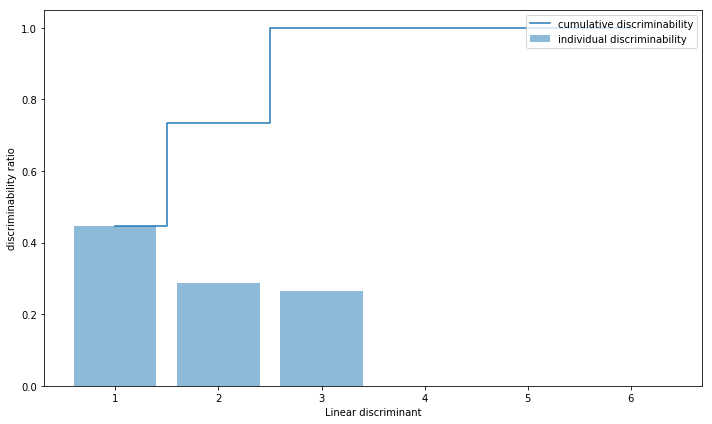

In [35]:
tot=sum(eigen_vals.real)
discr=[(i/tot) for i in sorted(eigen_vals.real,reverse=True)]
cum_discr=np.cumsum(discr)

plt.figure(figsize=(10,6))
plt.bar(range(1,7),discr,alpha=0.5,align='center',label='individual discriminability')
plt.step(range(1,7),cum_discr,where='mid',label='cumulative discriminability')
plt.ylabel('discriminability ratio')
plt.xlabel('Linear discriminant')
plt.legend(loc='upper right')
plt.tight_layout()
    

In [36]:
 print('Linear discriminant ',cum_discr)

Linear discriminant  [ 0.4473  0.7351  1.      1.      1.      1.    ]


In [37]:
w=np.hstack((eigen_pairs[0][1][:,np.newaxis],
            eigen_pairs[1][1][:,np.newaxis],
            #eigen_pairs[2][1][:,np.newaxis]
            ))
print('Matrix W:\n',w)

Matrix W:
 [[ 0.6339+0.j  0.7501+0.j]
 [-0.4771+0.j  0.1324+0.j]
 [ 0.0504+0.j -0.1322+0.j]
 [-0.6006+0.j -0.6207+0.j]
 [-0.0416+0.j -0.1033+0.j]
 [-0.0753+0.j -0.0810+0.j]]


The following scatter-plot represents the data using the first two linear discriminants. We can observe that with LDA we have a better separability of classes than the PCA.

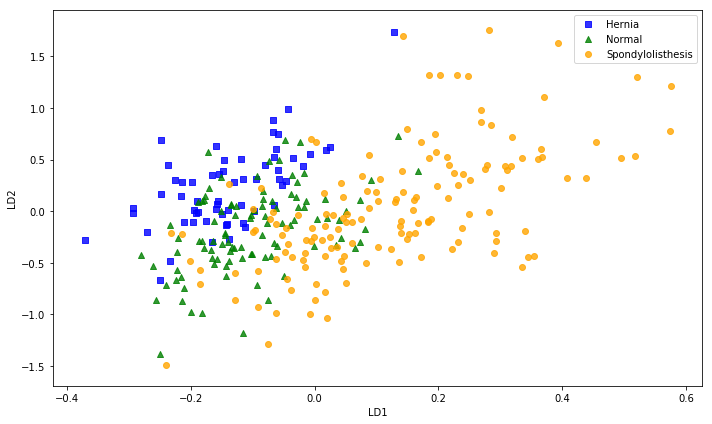

In [38]:
X_std_lda=X_std.dot(w.real)
colors=['blue','green','orange']
markers=['s','^','o']
plt.figure(figsize=(10,6))
for lab,col,m in zip(np.unique(Y),colors,markers):
    plt.scatter(X_std_lda[Y==lab,0]*-1,X_std_lda[Y==lab,1],label=lab,c=col,marker=m,alpha=0.8)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show() 


In [104]:
#Implementation of LDA using sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
sklearn_lda=LDA(n_components=2)
X_lda_sklearn=sklearn_lda.fit_transform(X,Y)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [105]:
print(sklearn_lda.explained_variance_ratio_ )

[ 0.9136  0.0864]


In [40]:
def plot_scikit_lda(X,title):
    plt.figure(figsize=(10,6))
    for label,marker,color in zip(
    np.unique(Y),('s','^','o'),('blue','green','orange')):
        plt.scatter(x=X[:,0][Y==label],
                   y=X[:,1][Y==label],
                    label=label,
                   marker=marker,
                   color=color,
                   alpha=0.8)
    plt.xlabel('LD1')
    plt.ylabel('LD2')
    leg= plt.legend(loc='upper right', fancybox=True)
    
   # plt.title(title)
    
    plt.tick_params(axis="both",which="both",bottom="off",top="off",labelbottom="on",left="off",right="off",labelleft="on")
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    
   # plt.grid()
    plt.tight_layout
    plt.show()   

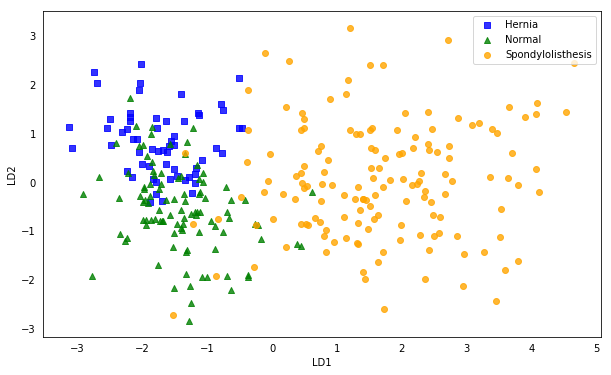

In [41]:
plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')

# Train_test_split method

In [42]:
from sklearn.model_selection import train_test_split,StratifiedKFold
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)
print('X_train dim:', x_train.shape)
print('X_test dim:',x_test.shape)

X_train dim: (247, 6)
X_test dim: (62, 6)


In [43]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

With the following I represent a DataFrame,that contains train_score and test_score of different classifier, using train_test-split method

In [45]:

models=[LogisticRegression(multi_class='multinomial',solver='newton-cg'),LogisticRegression(),DecisionTreeClassifier(max_depth=3),DecisionTreeClassifier(max_depth=5),
        KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=8),KNeighborsClassifier(n_neighbors=16)]
classifier_comparison=pd.DataFrame(columns=['Classificatore','train_score','test_score'])
for i in range(len(models)):
    models[i].fit(x_train,y_train)
    if i==0:
        classifier_comparison.loc[i,'Classificatore']='MultinomialLogisticRegression'
        classifier_comparison.loc[i,'train_score']=models[i].score(x_train,y_train)
        classifier_comparison.loc[i,'test_score']=models[i].score(x_test,y_test)
    elif i==1:
        classifier_comparison.loc[i,'Classificatore']='LogisticRegression'
        classifier_comparison.loc[i,'train_score']=models[i].score(x_train,y_train)
        classifier_comparison.loc[i,'test_score']=models[i].score(x_test,y_test)
    elif i==2:
        dtree=models[i]
        classifier_comparison.loc[i,'Classificatore']='DecisionTreeClassifier (max_depth=3)'
        classifier_comparison.loc[i,'train_score']=models[i].score(x_train,y_train)
        classifier_comparison.loc[i,'test_score']=models[i].score(x_test,y_test)
    elif i==3:
        classifier_comparison.loc[i,'Classificatore']='DecisionTreeClassifier (max_depth=5)'
        classifier_comparison.loc[i,'train_score']=models[i].score(x_train,y_train)
        classifier_comparison.loc[i,'test_score']=models[i].score(x_test,y_test)
    elif i==4:
        classifier_comparison.loc[i,'Classificatore']='KNeignborsClassifier (k=3)'
        classifier_comparison.loc[i,'train_score']=models[i].score(x_train,y_train)
        classifier_comparison.loc[i,'test_score']=models[i].score(x_test,y_test)
    elif i==5:
        classifier_comparison.loc[i,'Classificatore']='KNeignborsClassifier (k=8)'
        classifier_comparison.loc[i,'train_score']=models[i].score(x_train,y_train)
        classifier_comparison.loc[i,'test_score']=models[i].score(x_test,y_test)
    elif i==6:
        classifier_comparison.loc[i,'Classificatore']='KNeignborsClassifier (k=16)'
        classifier_comparison.loc[i,'train_score']=models[i].score(x_train,y_train)
        classifier_comparison.loc[i,'test_score']=models[i].score(x_test,y_test)  
    else:
        classifier_comparison.loc[i,'Classificatore']=models[i].__class__.__name__
        classifier_comparison.loc[i,'train_score']=models[i].score(x_train,y_train)
        classifier_comparison.loc[i,'test_score']=models[i].score(x_test,y_test)  
classifier_comparison
    

,Classificatore,train_score,test_score
0,MultinomialLogisticRegression,0.874494,0.854839
1,LogisticRegression,0.834008,0.83871
2,DecisionTreeClassifier (max_depth=3),0.862348,0.806452
3,DecisionTreeClassifier (max_depth=5),0.951417,0.725806
4,KNeignborsClassifier (k=3),0.91498,0.870968
5,KNeignborsClassifier (k=8),0.878543,0.854839
6,KNeignborsClassifier (k=16),0.866397,0.870968


# K-fold cross-validation method

With the following I represent a DataFrame,that contains train_score and test_score of different classifier, using train_test-split method.

In [46]:
models=[LogisticRegression(multi_class='multinomial',solver='newton-cg'),LogisticRegression(),DecisionTreeClassifier(max_depth=3),DecisionTreeClassifier(max_depth=5),KNeighborsClassifier(n_neighbors=3),
        KNeighborsClassifier(n_neighbors=8),KNeighborsClassifier(n_neighbors=16)]
kfold=StratifiedKFold(n_splits=10,random_state=42)
classifier_comparison=pd.DataFrame(columns=['Classificatore','train_score','test_score'])
for i, model in enumerate(models):
    classifier=model
    cv_result=cross_validate(model,X,Y,cv=kfold,scoring='accuracy')
    if i==0:
        classifier_comparison.loc[i,'Classificatore']='MultinomialLogisticRegression'
        classifier_comparison.loc[i,'train_score']=cv_result['train_score'].mean()
        classifier_comparison.loc[i,'test_score']=cv_result['test_score'].mean()
    elif i==1:
        classifier_comparison.loc[i,'Classificatore']='LogisticRegression'
        classifier_comparison.loc[i,'train_score']=cv_result['train_score'].mean()    
        classifier_comparison.loc[i,'test_score']=cv_result['test_score'].mean()
    elif i==2:
        classifier_comparison.loc[i,'Classificatore']='DecisionTreeClassifier (max_depth=3)'
        classifier_comparison.loc[i,'train_score']=cv_result['train_score'].mean()
        classifier_comparison.loc[i,'test_score']=cv_result['test_score'].mean()
    elif i==3:
        classifier_comparison.loc[i,'Classificatore']='DecisionTreeClassifier (max_depth=5)'
        classifier_comparison.loc[i,'train_score']=cv_result['train_score'].mean()
        classifier_comparison.loc[i,'test_score']=cv_result['test_score'].mean()
    elif i==4:
        classifier_comparison.loc[i,'Classificatore']='KNeignborsClassifier (k=3)'
        classifier_comparison.loc[i,'train_score']=cv_result['train_score'].mean()
        classifier_comparison.loc[i,'test_score']=cv_result['test_score'].mean()  
    elif i==5:
        classifier_comparison.loc[i,'Classificatore']='KNeignborsClassifier (k=8)'
        classifier_comparison.loc[i,'train_score']=cv_result['train_score'].mean()
        classifier_comparison.loc[i,'test_score']=cv_result['test_score'].mean() 
    elif i==6:
        classifier_comparison.loc[i,'Classificatore']='KNeignborsClassifier (k=16)'
        classifier_comparison.loc[i,'train_score']=cv_result['train_score'].mean()
        classifier_comparison.loc[i,'test_score']=cv_result['test_score'].mean()  
    
    else:
        classifier_comparison.loc[i,'Classificatore']=model.__class__.__name__
        classifier_comparison.loc[i,'train_score']=cv_result['train_score'].mean()
        classifier_comparison.loc[i,'test_score']= cv_result['test_score'].mean()
classifier_comparison


,Classificatore,train_score,test_score
0,MultinomialLogisticRegression,0.875582,0.857634
1,LogisticRegression,0.837828,0.812258
2,DecisionTreeClassifier (max_depth=3),0.861564,0.828387
3,DecisionTreeClassifier (max_depth=5),0.928443,0.815269
4,KNeignborsClassifier (k=3),0.9173,0.815699
5,KNeignborsClassifier (k=8),0.871988,0.847849
6,KNeignborsClassifier (k=16),0.866235,0.834839


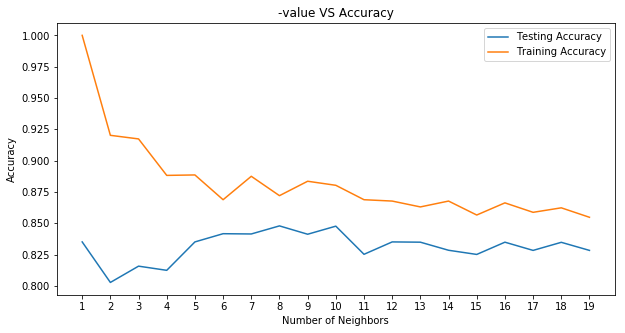

Best accuracy is 0.8478494623655914 with K = 8


In [52]:
#complexity of the model using K-NN
neig = np.arange(1, 20)
train_accuracy = []
test_accuracy = []
train = np.array(X)
labels = np.array(Y)

# Loop over different value of k to know for which k I have the best accuracy
for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    test_sum=0
    train_sum=0
    for train_index, test_index in kfold.split(train,labels):
        X_train, X_test = [train[i] for i in train_index],[train[j] for j in test_index]
        y_train, y_test = [labels[i] for i in train_index],[labels[j] for j in test_index]
        knn.fit(X_train,y_train)
        test_sum+= knn.score(X_test,y_test)
        train_sum+=knn.score(X_train,y_train)
    
    train_accuracy.append((train_sum/10))
    # test accuracy
    test_accuracy.append((test_sum/10))
# Plot
plt.figure(figsize=[10,5])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))


- I check the model's performance on the data on which I applied the PCA

In [53]:
models=[LogisticRegression(multi_class='multinomial',solver='newton-cg'),LogisticRegression(),DecisionTreeClassifier(max_depth=3),DecisionTreeClassifier(max_depth=5),KNeighborsClassifier(n_neighbors=3),
        KNeighborsClassifier(n_neighbors=8),KNeighborsClassifier(n_neighbors=16)]
kfold=StratifiedKFold(n_splits=10,random_state=42)
classifier_comparison=pd.DataFrame(columns=['Classificatore','train_score','test_score'])
for i, model in enumerate(models):
    classifier=model
    cv_result=cross_validate(model,X_std_pca,Y,cv=kfold,scoring='accuracy')
    if i==0:
        classifier_comparison.loc[i,'Classificatore']='MultinomialLogisticRegression'
        classifier_comparison.loc[i,'train_score']=cv_result['train_score'].mean()
        classifier_comparison.loc[i,'test_score']=cv_result['test_score'].mean()
    elif i==1:
        classifier_comparison.loc[i,'Classificatore']='LogisticRegression'
        classifier_comparison.loc[i,'train_score']=cv_result['train_score'].mean()    
        classifier_comparison.loc[i,'test_score']=cv_result['test_score'].mean()
    elif i==2:
        classifier_comparison.loc[i,'Classificatore']='DecisionTreeClassifier (max_depth=3)'
        classifier_comparison.loc[i,'train_score']=cv_result['train_score'].mean()
        classifier_comparison.loc[i,'test_score']=cv_result['test_score'].mean()
    elif i==3:
        classifier_comparison.loc[i,'Classificatore']='DecisionTreeClassifier (max_depth=5)'
        classifier_comparison.loc[i,'train_score']=cv_result['train_score'].mean()
        classifier_comparison.loc[i,'test_score']=cv_result['test_score'].mean()
    elif i==4:
        classifier_comparison.loc[i,'Classificatore']='KNeignborsClassifier (k=3)'
        classifier_comparison.loc[i,'train_score']=cv_result['train_score'].mean()
        classifier_comparison.loc[i,'test_score']=cv_result['test_score'].mean()
    elif i==5:
        classifier_comparison.loc[i,'Classificatore']='KNeignborsClassifier (k=8)'
        classifier_comparison.loc[i,'train_score']=cv_result['train_score'].mean()
        classifier_comparison.loc[i,'test_score']=cv_result['test_score'].mean() 
    elif i==6:
        classifier_comparison.loc[i,'Classificatore']='KNeignborsClassifier (k=16)'
        classifier_comparison.loc[i,'train_score']=cv_result['train_score'].mean()
        classifier_comparison.loc[i,'test_score']=cv_result['test_score'].mean()  
    
    else:
        classifier_comparison.loc[i,'Classificatore']=model.__class__.__name__
        classifier_comparison.loc[i,'train_score']=cv_result['train_score'].mean()
        classifier_comparison.loc[i,'test_score']= cv_result['test_score'].mean()
classifier_comparison






,Classificatore,train_score,test_score
0,MultinomialLogisticRegression,0.673499,0.670108
1,LogisticRegression,0.673141,0.663656
2,DecisionTreeClassifier (max_depth=3),0.726005,0.686129
3,DecisionTreeClassifier (max_depth=5),0.767358,0.673226
4,KNeignborsClassifier (k=3),0.792874,0.618387
5,KNeignborsClassifier (k=8),0.726362,0.647204
6,KNeignborsClassifier (k=16),0.711257,0.663656


- I check the model's performance on the data on which I applied the LDA

In [54]:
models=[LogisticRegression(multi_class='multinomial',solver='newton-cg'),LogisticRegression(),DecisionTreeClassifier(max_depth=3),DecisionTreeClassifier(max_depth=5),KNeighborsClassifier(n_neighbors=3),
        KNeighborsClassifier(n_neighbors=8),KNeighborsClassifier(n_neighbors=16)]
kfold=StratifiedKFold(n_splits=10,random_state=42)
classifier_comparison=pd.DataFrame(columns=['Classificatore','train_score','test_score'])
for i, model in enumerate(models):
    classifier=model
    cv_result=cross_validate(model,X_lda_sklearn,Y,cv=kfold,scoring='accuracy')
    if i==0:
        classifier_comparison.loc[i,'Classificatore']='MultinomialLogisticRegression'
        classifier_comparison.loc[i,'train_score']=cv_result['train_score'].mean()
        classifier_comparison.loc[i,'test_score']=cv_result['test_score'].mean()
    elif i==1:
        classifier_comparison.loc[i,'Classificatore']='LogisticRegression'
        classifier_comparison.loc[i,'train_score']=cv_result['train_score'].mean()    
        classifier_comparison.loc[i,'test_score']=cv_result['test_score'].mean()
    elif i==2:
        classifier_comparison.loc[i,'Classificatore']='DecisionTreeClassifier (max_depth=3)'
        classifier_comparison.loc[i,'train_score']=cv_result['train_score'].mean()
        classifier_comparison.loc[i,'test_score']=cv_result['test_score'].mean()
    elif i==3:
        classifier_comparison.loc[i,'Classificatore']='DecisionTreeClassifier (max_depth=5)'
        classifier_comparison.loc[i,'train_score']=cv_result['train_score'].mean()
        classifier_comparison.loc[i,'test_score']=cv_result['test_score'].mean()
    elif i==4:
        classifier_comparison.loc[i,'Classificatore']='KNeignborsClassifier (k=3)'
        classifier_comparison.loc[i,'train_score']=cv_result['train_score'].mean()
        classifier_comparison.loc[i,'test_score']=cv_result['test_score'].mean()  
    elif i==5:
        classifier_comparison.loc[i,'Classificatore']='KNeignborsClassifier (k=8)'
        classifier_comparison.loc[i,'train_score']=cv_result['train_score'].mean()
        classifier_comparison.loc[i,'test_score']=cv_result['test_score'].mean() 
    elif i==6:
        classifier_comparison.loc[i,'Classificatore']='KNeignborsClassifier (k=16)'
        classifier_comparison.loc[i,'train_score']=cv_result['train_score'].mean()
        classifier_comparison.loc[i,'test_score']=cv_result['test_score'].mean()  
    
    else:
        classifier_comparison.loc[i,'Classificatore']=model.__class__.__name__
        classifier_comparison.loc[i,'train_score']=cv_result['train_score'].mean()
        classifier_comparison.loc[i,'test_score']= cv_result['test_score'].mean()
classifier_comparison


,Classificatore,train_score,test_score
0,MultinomialLogisticRegression,0.846818,0.838172
1,LogisticRegression,0.849697,0.841613
2,DecisionTreeClassifier (max_depth=3),0.876666,0.851183
3,DecisionTreeClassifier (max_depth=5),0.904712,0.83828
4,KNeignborsClassifier (k=3),0.901118,0.793011
5,KNeignborsClassifier (k=8),0.865875,0.83828
6,KNeignborsClassifier (k=16),0.868393,0.85129


By comparing the model results after applying the PCA and after applying the LDA, it can be seen that using the LDA results are much better than using PCA. In particular the results that I obtain with after I applied LDA are very similar to the results that I obtain using the original dataset without using feature extraction techniques.

The following is the graphical representation of Decision-Tree with max depth equal to three. In particular from this representation we can see that the variable 'degree_spondylolisthesis' split the dataset in two subset. In particular for 'degree_spondylolistesis'<=16.079 the patients tend to belong principally to the classes are Hernia and Normal instead for values of  'degree_spondylolistesis'>=16.079 the patients principally belong to the class Spondilolystesis.Thanks to the Gini index is possible to analyze the impurity of each node of the tree; moreover it is possible to observe for each class, what is the number of patients that belong to each class.

train score:  0.861563652304
test score:  0.825161290323


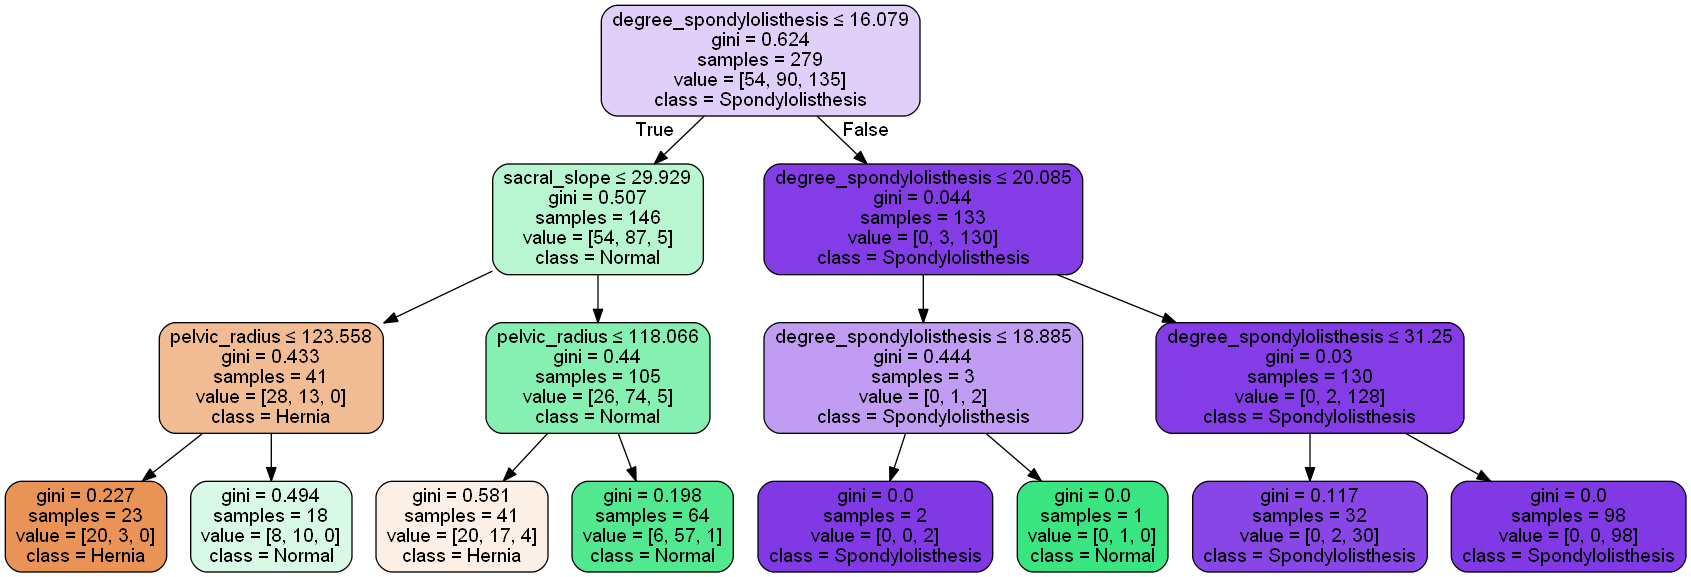

In [60]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

train = np.array(X)
labels = np.array(Y)
dtree=DecisionTreeClassifier(max_depth=3)
test_sum=0
train_sum=0
for train_index, test_index in kfold.split(train,labels):
    X_train, X_test = [train[i] for i in train_index],[train[j] for j in test_index]
    y_train, y_test = [labels[i] for i in train_index],[labels[j] for j in test_index]
    dtree.fit(X_train,y_train)
    test_sum+= dtree.score(X_test,y_test)
    train_sum+=dtree.score(X_train,y_train)

print("train score: ",train_sum/10)
print("test score: ",test_sum/10)
labels=[]
for i in range(0,6):
    labels.append(df.columns[i])

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=labels,class_names=['Hernia', 'Normal', 'Spondylolisthesis'],
                filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Learning curve

In [67]:
from sklearn.utils import shuffle
X_shuf, Y_shuf = shuffle(X, Y)


- Learning curve using Multinomial Logistic Regression classifier

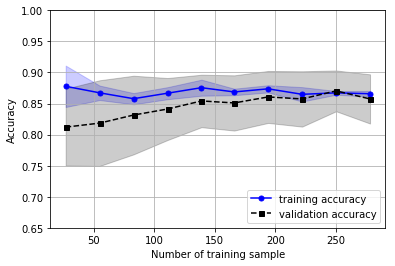

In [68]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
cv=StratifiedKFold(n_splits=10)
pipe_lr=make_pipeline(StandardScaler(),LogisticRegression(multi_class='multinomial',solver='newton-cg',random_state=42))
train_sizes,train_scores,test_scores= learning_curve(estimator=pipe_lr,X=X_shuf,y=Y_shuf,train_sizes=np.linspace(0.1,1.0,10),cv=cv,n_jobs=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.2,color='blue')
plt.plot(train_sizes,test_mean,color='black',linestyle='--',marker='s',markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.2,color='black')
plt.grid()
plt.xlabel('Number of training sample')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.65,1.0])
plt.show()

From the above curve, we observe that our model works really well already when we evaluate only 150 samples and we can see how it tends to increase accuracy as the size of the dataset.

- Learning curve using Decision-Tree classifier with max depth equal to 3

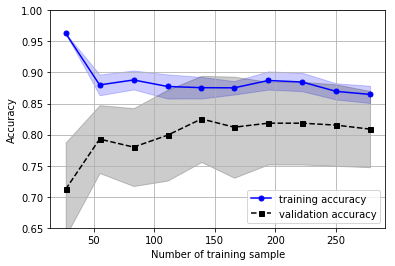

In [107]:
pipe_lr1=make_pipeline(StandardScaler(),DecisionTreeClassifier(max_depth=3,random_state=1))
train_sizes,train_scores,test_scores= learning_curve(estimator=pipe_lr1,X=X_shuf,y=Y_shuf,train_sizes=np.linspace(0.1,1.0,10),cv=cv,n_jobs=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.2,color='blue')
plt.plot(train_sizes,test_mean,color='black',linestyle='--',marker='s',markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.2,color='black')
plt.grid()
plt.xlabel('Number of training sample')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.65,1.0])
plt.show()

The above learning curve, in which we use the Decision Tree classifier with depth 3, shows us how this classification technique initially suffers from overfitting seen the marked gap between the two accuracy curves; in particular, we note how this gap tends to get thinner with the increase in the number of samples taken into consideration, until reaching an accuracy of almost 85% when we have considered more than 250 samples.

- Learning curve using K-NN classifier with k=8

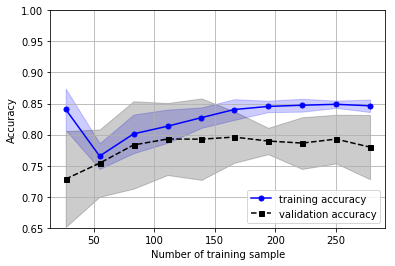

In [70]:
pipe_lr2=make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=8))
train_sizes,train_scores,test_scores= learning_curve(estimator=pipe_lr2,X=X_shuf,y=Y_shuf,train_sizes=np.linspace(0.1,1.0,10),cv=cv,n_jobs=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.2,color='blue')
plt.plot(train_sizes,test_mean,color='black',linestyle='--',marker='s',markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.2,color='black')
plt.grid()
plt.xlabel('Number of training sample')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.65,1.0])
plt.show()

The above learning curve, shows us that the K-Nearest-Neighbors classifier achieves its greater accuracy when we considered about 150 samples and then lost accuracy. As the number of data taken into consideration increases, it seems that the accuracy of the training set and the test set tend to converge again. In this case with a larger dataset we could have removed some doubt.

# Confusion Matrix, Precision, Recall

Previously I evaluated my models using Accuracy metric.
Now to measure the performance of the model I use Precision and Recall that I will derive from Confusion Matrix

In [72]:
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,cmap=plt.cm.Blues):
    
    #This function prints and plots the confusion matrix.
   #Normalization can be applied by setting `normalize=True`.
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(multi_class='multinomial',solver='newton-cg'), X, Y, cv=cv)
from sklearn.model_selection import cross_val_predict
y_predL = cross_val_predict(LogisticRegression(multi_class='multinomial',solver='newton-cg'), X, Y, cv=cv)
conf_matL = confusion_matrix(Y, y_predL)


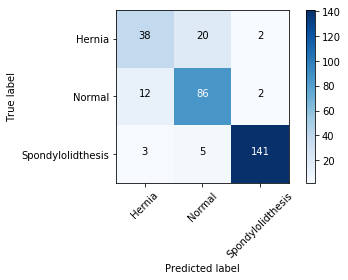

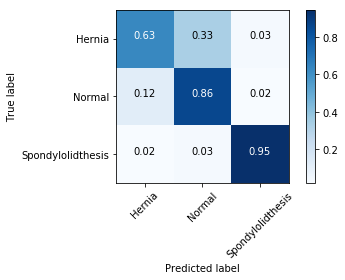

In [74]:
class_names=['Hernia','Normal','Spondylolidthesis']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matL, classes=class_names )

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matL, classes=class_names, normalize=True )

plt.show()

In [75]:
recall=np.diag(conf_matL)/np.sum(conf_matL,axis=1)
precision=np.diag(conf_matL)/np.sum(conf_matL,axis=0)
#print(pd.DataFrame(recall,columns=['Recall']))
#print(pd.DataFrame(precision,columns=['Precision']))
comparison=pd.DataFrame(index=['Hernia','Normal','Spondylolisthesis'],columns=['Recall %','Precision %'])
comparison['Recall %']=recall*100
comparison['Precision %']=precision*100
comparison

,Recall %,Precision %
Hernia,63.333333,71.698113
Normal,86.000000,77.477477
Spondylolisthesis,94.630872,97.241379


In [76]:
scores = cross_val_score(DecisionTreeClassifier(max_depth=3), X, Y, cv=cv)
y_predD = cross_val_predict(DecisionTreeClassifier(max_depth=3), X, Y, cv=cv)
conf_matD = confusion_matrix(Y, y_predD)

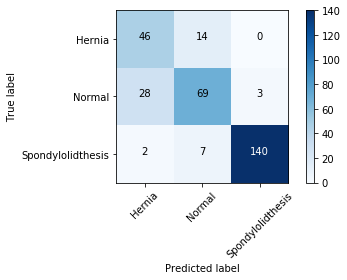

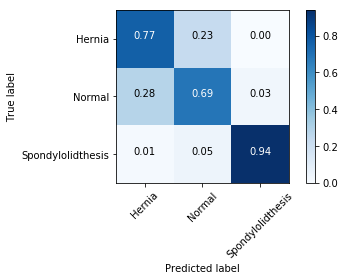

In [77]:
plt.figure()
plot_confusion_matrix(conf_matD, classes=class_names )

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matD, classes=class_names, normalize=True )

plt.show()

In [78]:
recall=np.diag(conf_matD)/np.sum(conf_matD,axis=1)
precision=np.diag(conf_matD)/np.sum(conf_matD,axis=0)
#print(pd.DataFrame(recall,columns=['Recall']))
#print(pd.DataFrame(precision,columns=['Precision']))
comparison=pd.DataFrame(index=['Hernia','Normal','Spondylolisthesis'],columns=['Recall %','Precision %'])
comparison['Recall %']=recall*100
comparison['Precision %']=precision*100
comparison

,Recall %,Precision %
Hernia,76.666667,60.526316
Normal,69.000000,76.666667
Spondylolisthesis,93.959732,97.902098


In [79]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=8), X, Y, cv=cv)
y_predK = cross_val_predict(KNeighborsClassifier(n_neighbors=8), X, Y, cv=cv)
conf_matK = confusion_matrix(Y, y_predK)

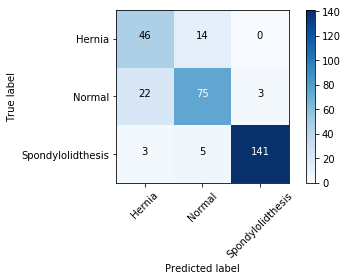

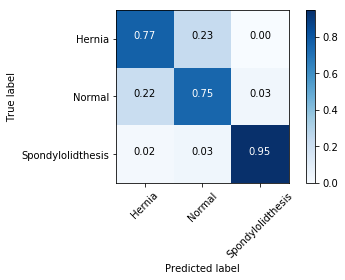

In [80]:
plt.figure()
plot_confusion_matrix(conf_matK, classes=class_names )

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matK, classes=class_names, normalize=True )

plt.show()

In [81]:
recall=np.diag(conf_matK)/np.sum(conf_matK,axis=1)
precision=np.diag(conf_matK)/np.sum(conf_matK,axis=0)
#print(pd.DataFrame(recall,columns=['Recall']))
#print(pd.DataFrame(precision,columns=['Precision']))
comparison=pd.DataFrame(index=['Hernia','Normal','Spondylolisthesis'],columns=['Recall %','Precision %'])
comparison['Recall %']=recall*100
comparison['Precision %']=precision*100
comparison

,Recall %,Precision %
Hernia,76.666667,64.788732
Normal,75.000000,79.787234
Spondylolisthesis,94.630872,97.916667


# Conclusions

Through the techniques of feature extraction used to reduce the dimensionality of the data, and being that my goal is to represent the data through two main components, we obtain a discrete result using the PCA while we have a very good result using the LDA.
Furthermore, it can be observed, how the results obtained using only the first two components of the LDA are very close to the results obtained using the original dataset, without having applied feature extraction techniques. Considering that there is not much difference in the results, it is convenient to reduce the dimensionality of the data through the LDA, both because it allows to improve the computational efficiency of the learning algorithm and because sometimes it allows to improve the performance during the prediction phase.

However, I have found that patients labeled with the "Hernia" and "Normal" classes have similar characteristics and there is no clear division between the two classes, while patients labeled with the "Spondylolisthesis" class are more separate than the other two classes.
In general, for the analyzed dataset, the techniques used are quite efficient, in fact in most cases the accuracy is around 85%.

The generated models will then be able to accurately predict with the patient class for new records that will be added to the dataset, provided they have the same structure with the same attributes and classes.